# Data Storytelling - JOLTS
#### _A look at US Job Openings data over time_
***
_Michael Garber_

# Table of Contents
> 1. Introduce dataset
2. Pick Audience
3. EDA
4. Create Narrative
5. Presentation

## Introduction

- I have chosen to analyze the the ***JOLTS*** dataset

- "The Job Openings and Labor Turnover Survey (JOLTS) program of the Bureau of Labor Statistics (BLS) produces monthly and annual estimates of job openings, hires, and separations for the nation."

- Goal: share the story told by the recent trends found within. I will specifically focus on the job openings to understand the labor demands.

- Data Set
> Info URL - https://www.bls.gov/jlt/jltover.htm \
Data URL - https://download.bls.gov/pub/time.series/jt/jt.data.2.JobOpenings \
Data Definitions - https://download.bls.gov/pub/time.series/jt/jt.txt

## Pick Audience

- I have chosen to target a ***non-technical audience***.
    - I will take care to make the findings accessible and ***hopefully*** _interesting._

## EDA
> What can we learn about the data?

- Can I count something interesting?
- Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
- Can I make a bar plot or a histogram?
- Can I compare two related quantities?
- Can I make a scatterplot?
- Can I make a time-series plot?
- Looking at the plots, what are some insights I can make?
- Can I see any correlations?
- Is there a hypothesis I can - and should - investigate further?
- What other questions are the insights leading me to ask?

In [7]:
# Import Libraries
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time
from datetime import date

In [22]:
# set input file col widths
colWidths = [31, 5, 12, 4, 1]

# Import JOLTS Data set
joltsData = pd.read_fwf(filepath_or_buffer="Data/jt.data.2.JobOpenings", widths=colWidths)

In [23]:
# check data head
joltsData.head()

,series_id,year,period,va,l
0,JTS000000000000000JOL,2000,M12,5088.0,NaN
1,JTS000000000000000JOL,2001,M01,5234.0,NaN
2,JTS000000000000000JOL,2001,M02,5097.0,NaN
3,JTS000000000000000JOL,2001,M03,4762.0,NaN
4,JTS000000000000000JOL,2001,M04,4615.0,NaN


In [26]:
joltsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105634 entries, 0 to 105633
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   series_id  105634 non-null  object 
 1   year       105634 non-null  int64  
 2   period     105634 non-null  object 
 3   va         105634 non-null  float64
 4   l          0 non-null       float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ MB


In [28]:
# check data cleanliness
print(joltsData['period'].value_counts())
print(joltsData['year'].value_counts())

period
M02              8540
M03              8540
M05              8540
M12              8539
M04              8539
M06              8539
M09              8539
M01              8538
M08              8538
M07              8536
M11              8183
M10              8181
M13              3816
M07\t       1       8
M10\t       1       7
M08\t       1       6
M01\t       1       6
M09\t       1       5
M11\t       1       5
M12\t       1       5
M04\t       1       5
M06\t       1       5
M02\t       1       4
M03\t       1       4
M05\t       1       4
M13\t       1       2
Name: count, dtype: int64
year
2012    4438
2001    4438
2021    4438
2020    4438
2019    4438
2018    4438
2017    4438
2016    4438
2015    4438
2014    4438
2013    4438
2011    4438
2023    4438
2010    4438
2009    4438
2008    4438
2007    4438
2006    4438
2005    4438
2004    4438
2003    4438
2002    4438
2022    4438
2024    3204
2000     356
Name: count, dtype: int64


In [30]:
# Clean Data

# Drop unneeded Columns
joltsData = joltsData.drop(['series_id', 'l'], axis=1)

# Drop rows with wierd month notations (e.x. "M06\t 1	")
rowsToDrop = joltsData[joltsData['period'].str.contains('\t')].index
joltsData = joltsData.drop(index=rowsToDrop)
#joltsData[joltsData['period'].str.contains('\t')]

In [32]:
# Check DF after cleaning
joltsData.head()

,year,period,va
0,2000,M12,5088.0
1,2001,M01,5234.0
2,2001,M02,5097.0
3,2001,M03,4762.0
4,2001,M04,4615.0


In [34]:
# re-check data cleanliness - post clean
print(joltsData['period'].value_counts())

period
M02    8540
M03    8540
M05    8540
M12    8539
M04    8539
M06    8539
M09    8539
M01    8538
M08    8538
M07    8536
M11    8183
M10    8181
M13    3816
Name: count, dtype: int64


In [36]:
input()

KeyboardInterrupt: Interrupted by user

In [51]:
'''
Assembling a datetime from multiple columns of a :class:`DataFrame`. The keys
can be common abbreviations like ['year', 'month', 'day', 'minute', 'second',
'ms', 'us', 'ns']) or plurals of the same

>>> df = pd.DataFrame({'year': [2015, 2016],
...                    'month': [2, 3],
...                    'day': [4, 5]})
>>> pd.to_datetime(df)
0   2015-02-04
1   2016-03-05
'''


#joltsData['date'] = date(joltsData.year, joltsData.period)

#dir(joltsData)
#joltsData['date']
pd.to_datetime({'year': joltsData.year,
                'month': joltsData.period})

#joltsData.head()



Signature:
pd.to_datetime(
    arg: 'DatetimeScalarOrArrayConvertible | DictConvertible',
    errors: 'DateTimeErrorChoices' = 'raise',
    dayfirst: 'bool' = False,
    yearfirst: 'bool' = False,
    utc: 'bool' = False,
    format: 'str | None' = None,
    exact: 'bool | lib.NoDefault' = <no_default>,
    unit: 'str | None' = None,
    infer_datetime_format: 'lib.NoDefault | bool' = <no_default>,
    origin: 'str' = 'unix',
    cache: 'bool' = True,
) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
Docstring:
Convert argument to datetime.

This function converts a scalar, array-like, :class:`Series` or
:class:`DataFrame`/dict-like to a pandas datetime object.

Parameters
----------
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
    The object to convert to a datetime. If a :class:`DataFrame` is provided, the
    method expects minimally the following columns: :const:`"year"`,
    :const:`"month"`, :const:`"day"`. The column "year"
 

0         1
1         1
2         1
3         1
4         1
         ..
105563    1
105564    1
105565    1
105566    1
105567    1
Length: 105568, dtype: int64

In [99]:
'''
df[cols_to_check] = df[cols_to_check].replace({';':''}, regex=True)

'''

dfMonths = joltsData.period.replace({'M':''}, regex=True)
dfYears = joltsData.year

pd.to_datetime({'year' : dfYears,
                'month': dfMonths,
                'day'  : pd.Series([1] * 105568)})
#joltsData





ValueError: cannot assemble the datetimes: unconverted data remains when parsing with format "%Y%m%d": "1", at position 287. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [67]:
dfYears



0         2000
1         2001
2         2001
3         2001
4         2001
          ... 
105629    2024
105630    2024
105631    2024
105632    2024
105633    2024
Name: year, Length: 105568, dtype: int64

In [16]:

# set multi-index Yeand & period
#joltsData = joltsData.set_index(['year', 'period'])
joltsData.head()

va
year period        
2000 M12     5088.0
2001 M01     5234.0
     M02     5097.0
     M03     4762.0
     M04     4615.0

ValueError: setting an array element with a sequence.

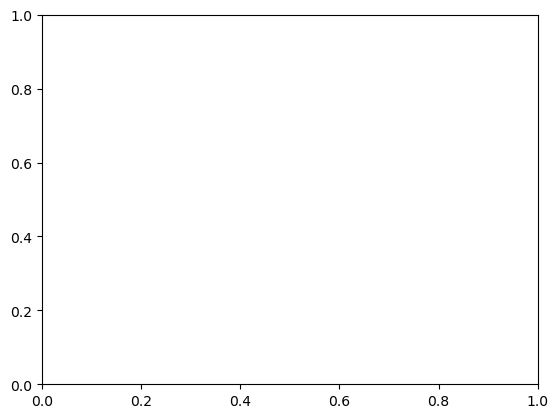

In [17]:
#plt.plot(joltsData.index, y=joltsData.va)
#plt.show()
plt.plot(joltsData)
plt.show()

In [ ]:
joltsData.index

joltsData.plot(marker='.', linestyle='None')

In [ ]:
joltsData.index.to

## Create Narrative
Narrative here...

## Presentation
presentation images and text in this section...

> The questions you asked? \
The trends you investigated? \
The resulting visualizations and conclusions?

## TODO
- scatter plot the data time by values


------
- read file command (read_fwf) not workng
- clean data before EDA
